In [15]:
import pandas as pd

salary_df = pd.read_excel('/Users/swikar/Desktop/GroupProject/salary_work_in_progress/salary_data_states.xlsx')
salary_df.head()


,CASE_NUMBER,CASE_STATUS,CASE_RECEIVED_DATE,DECISION_DATE,EMPLOYER_NAME,PREVAILING_WAGE_SUBMITTED,PREVAILING_WAGE_SUBMITTED_UNIT,PAID_WAGE_SUBMITTED,PAID_WAGE_SUBMITTED_UNIT,JOB_TITLE,...,PREVAILING_WAGE_SOC_TITLE,WORK_STATE,WORK_STATE_ABBREVIATION,WORK_POSTAL_CODE,FULL_TIME_POSITION_Y_N,VISA_CLASS,PREVAILING_WAGE_PER_YEAR,PAID_WAGE_PER_YEAR,JOB_TITLE_SUBGROUP,order
0,I-200-14073-248840,denied,3/14/2014,3/21/2014,"ADVANCED TECHNOLOGY GROUP USA, INC.",6217100.0,year,62171.0,year,SOFTWARE ENGINEER,...,"Software Developers, Applications",Illinois,IL,NaN,y,H-1B,NaN,62171.0,software engineer,1
1,A-15061-55212,denied,3/19/2015,3/19/2015,SAN FRANCISCO STATE UNIVERSITY,5067600.0,year,91440.0,year,Assistant Professor of Marketing,...,"Business Teachers, Postsecondary",California,CA,94132.0,NaN,greencard,NaN,91440.0,assistant professor,2
2,I-200-13256-001092,denied,9/13/2013,9/23/2013,CAROUSEL SCHOOL,4947000.0,year,49470.0,year,SPECIAL EDUCATION TEACHER,...,"Special Education Teachers, Kindergarten and E...",California,CA,NaN,y,H-1B,NaN,49470.0,teacher,3
3,I-200-14087-353657,denied,3/28/2014,4/7/2014,HARLINGEN CONSOLIDATED INDEPENDENT SCHOOL DIST...,251052.0,month,43800.0,year,SCIENCE TEACHER,...,"Biological Science Teachers, Postsecondary",Texas,TX,NaN,y,H-1B,NaN,43800.0,teacher,4
4,I-203-14259-128844,denied,9/16/2014,9/23/2014,SIGNAL SCIENCES CORPORATION,84573.0,bi-weekly,170000.0,year,SENIOR SOFTWARE ENGINEER,...,"Software Developers, Systems Software",Oregon,OR,NaN,y,E-3 Australian,NaN,170000.0,software engineer,5


In [16]:
salary_df.describe()

,PREVAILING_WAGE_SUBMITTED,PAID_WAGE_SUBMITTED,EXPERIENCE_REQUIRED_NUM_MONTHS,PREVAILING_WAGE_PER_YEAR,PAID_WAGE_PER_YEAR,order
count,1.672780e+05,1.672780e+05,4965.000000,167210.000000,1.672780e+05,167278.000000
mean,7.115752e+04,8.164186e+04,34.692044,74274.868236,8.553277e+04,83714.716305
std,3.874624e+04,4.147703e+04,22.317783,25356.245893,3.873847e+04,48300.236431
min,5.050000e+00,5.050000e+00,0.000000,10504.000000,1.050000e+04,1.000000
25%,5.447500e+04,6.100000e+04,12.000000,56880.000000,6.300000e+04,41901.250000
50%,6.970100e+04,7.700000e+04,24.000000,70928.000000,7.860000e+04,83722.500000
75%,8.993700e+04,1.000000e+05,60.000000,90459.000000,1.000060e+05,125541.750000
max,6.217100e+06,2.500000e+06,144.000000,320000.000000,2.500000e+06,167361.000000


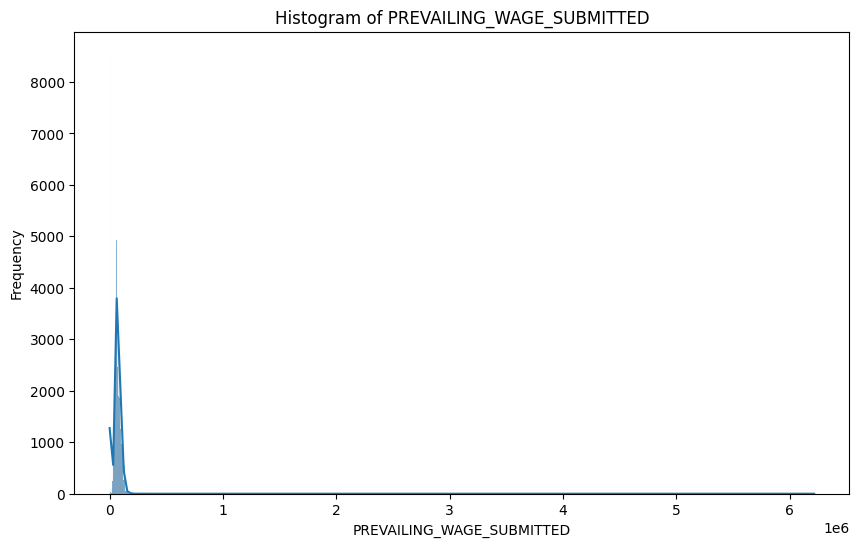

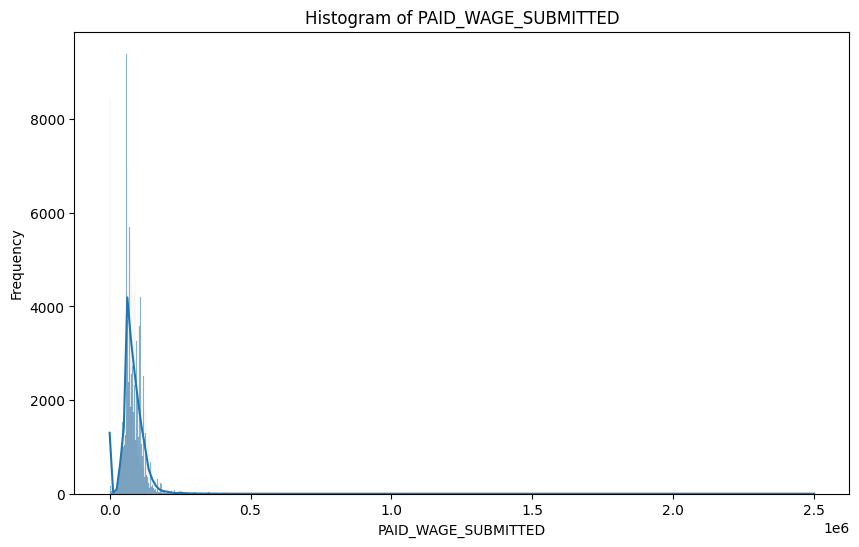

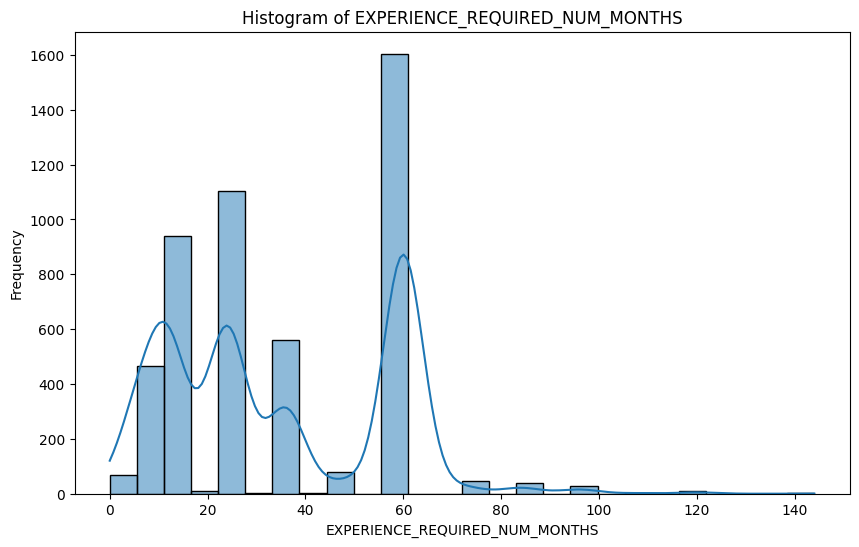

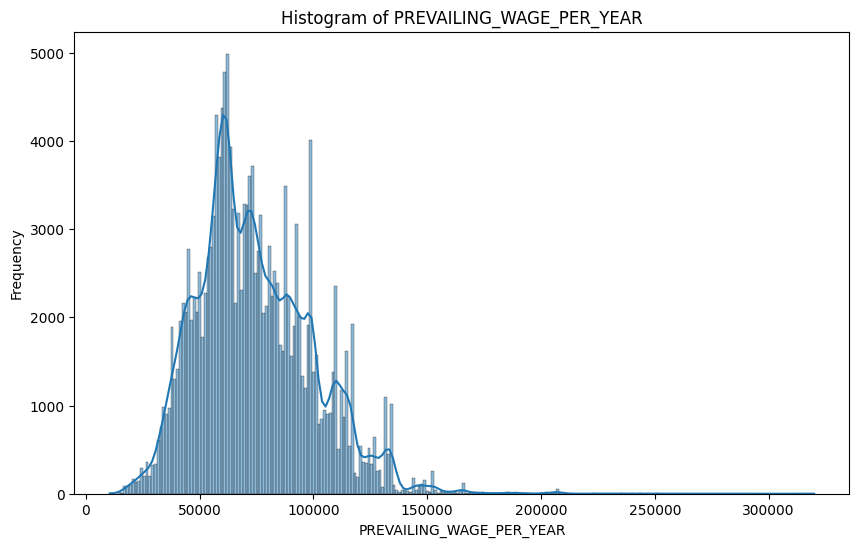

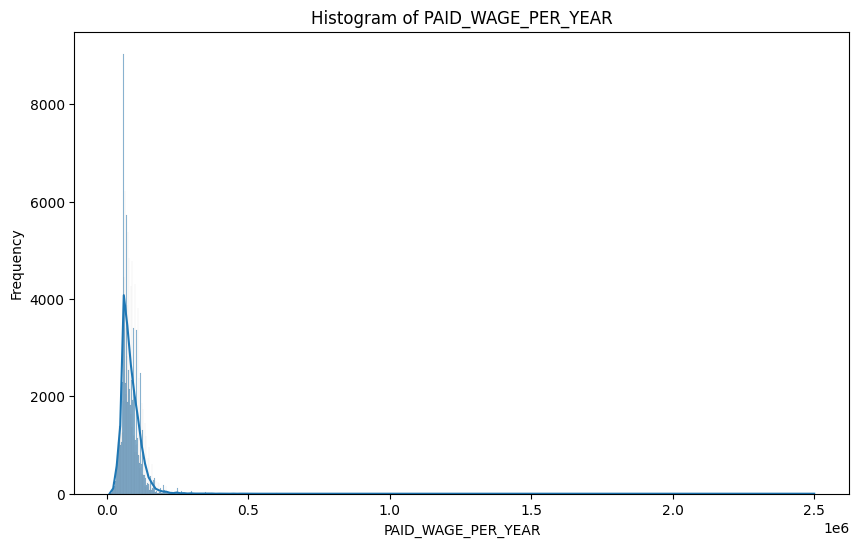

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Columns for which we want to plot histograms
columns = ['PREVAILING_WAGE_SUBMITTED', 'PAID_WAGE_SUBMITTED', 'EXPERIENCE_REQUIRED_NUM_MONTHS', 
           'PREVAILING_WAGE_PER_YEAR', 'PAID_WAGE_PER_YEAR']

# Loop through each column and create a histogram
for column in columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=salary_df, x=column, kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

             

In [22]:
import pandas as pd

file_path = '/Users/swikar/Desktop/GroupProject/salary_work_in_progress/salary_data_states.xlsx'
columns_to_load = [
    'EMPLOYER_NAME', 'PAID_WAGE_PER_YEAR', 'JOB_TITLE_SUBGROUP', 'WORK_STATE'
]
salary_df = pd.read_excel(file_path, sheet_name='Sheet1', usecols=columns_to_load)

data_jobs = salary_df[salary_df['JOB_TITLE_SUBGROUP'].str.contains('Data|Analyst|Engineer', case=False, na=False)]

avg_salaries_by_subtype = data_jobs.groupby('JOB_TITLE_SUBGROUP')['PAID_WAGE_PER_YEAR'].mean().sort_values(ascending=False)
print("Average Salaries for Data-Related Job Subtypes:")
print(avg_salaries_by_subtype)

highest_paying_companies = data_jobs.groupby(['JOB_TITLE_SUBGROUP', 'EMPLOYER_NAME'])['PAID_WAGE_PER_YEAR'].mean()

highest_paying_companies = highest_paying_companies.groupby(level=0).nlargest(5).reset_index(level=0, drop=True)
print("\nTop Companies with Highest Salaries for Each Data Job Subtype:")
print(highest_paying_companies)

salary_by_location = data_jobs.groupby(['JOB_TITLE_SUBGROUP', 'WORK_STATE'])['PAID_WAGE_PER_YEAR'].mean()

salary_by_location = salary_by_location.groupby(level=0).apply(lambda x: x.sort_values(ascending=False))
print("\nAverage Salaries by Job Subtype and Location:")
print(salary_by_location)


Average Salaries for Data-Related Job Subtypes:
JOB_TITLE_SUBGROUP
data scientist       108021.038248
software engineer     92505.303013
business analyst      71300.079566
data analyst          70030.078688
Name: PAID_WAGE_PER_YEAR, dtype: float64

Top Companies with Highest Salaries for Each Data Job Subtype:
JOB_TITLE_SUBGROUP  EMPLOYER_NAME                                
business analyst    THE UNIVERSITY OF TEXAS SYSTEM ADMINISTRATION    677508.000000
                    OFFICEMAX INCORPORATED                           603711.730000
                    ASCENDUM SOLUTIONS, LLC                          264992.000000
                    ELIE TAHARI LTD.                                 220000.000000
                    HARA-TECH, INC.                                  184683.000000
data analyst        INTUIT                                           433161.500000
                    KNOWLEDGENT GROUP INC.                           185000.000000
                    NETFLIX, INC.        

In [24]:
import pandas as pd

file_path = '/Users/swikar/Desktop/GroupProject/salary_work_in_progress/salary_data_states.xlsx'
columns_to_load = [
    'EMPLOYER_NAME', 'PAID_WAGE_PER_YEAR', 'JOB_TITLE_SUBGROUP', 'WORK_STATE'
]
salary_df = pd.read_excel(file_path, sheet_name='Sheet1', usecols=columns_to_load)

data_jobs = salary_df[salary_df['JOB_TITLE_SUBGROUP'].str.contains('Data|Analyst|Engineer', case=False, na=False)]

# Part I: Do specific sub-types of data-related jobs have higher or lower salaries than others?
avg_salaries_by_subtype = data_jobs.groupby('JOB_TITLE_SUBGROUP')['PAID_WAGE_PER_YEAR'].mean().sort_values(ascending=False)
print("Average Salaries for Data-Related Job Subtypes:")
print(avg_salaries_by_subtype)

# Part 1a: Which companies have the highest salaries for those subtypes?
highest_paying_companies = data_jobs.groupby(['JOB_TITLE_SUBGROUP', 'EMPLOYER_NAME'])['PAID_WAGE_PER_YEAR'].mean()

highest_paying_companies = highest_paying_companies.groupby(level=0).nlargest(5).reset_index(level=0, drop=True)
print("\nTop Companies with Highest Salaries for Each Data Job Subtype:")
print(highest_paying_companies)

# Part 1b: How does the location of the job affect salaries?
salary_by_location = data_jobs.groupby(['JOB_TITLE_SUBGROUP', 'WORK_STATE'])['PAID_WAGE_PER_YEAR'].mean()
salary_by_location = salary_by_location.groupby(level=0).apply(lambda x: x.sort_values(ascending=False))
print("\nAverage Salaries by Job Subtype and Location:")
print(salary_by_location)


Average Salaries for Data-Related Job Subtypes:
JOB_TITLE_SUBGROUP
data scientist       108021.038248
software engineer     92505.303013
business analyst      71300.079566
data analyst          70030.078688
Name: PAID_WAGE_PER_YEAR, dtype: float64

Top Companies with Highest Salaries for Each Data Job Subtype:
JOB_TITLE_SUBGROUP  EMPLOYER_NAME                                
business analyst    THE UNIVERSITY OF TEXAS SYSTEM ADMINISTRATION    677508.000000
                    OFFICEMAX INCORPORATED                           603711.730000
                    ASCENDUM SOLUTIONS, LLC                          264992.000000
                    ELIE TAHARI LTD.                                 220000.000000
                    HARA-TECH, INC.                                  184683.000000
data analyst        INTUIT                                           433161.500000
                    KNOWLEDGENT GROUP INC.                           185000.000000
                    NETFLIX, INC.        

In [25]:
import pandas as pd

file_path = '/mnt/data/salary_data_states.xlsx'
columns_to_load = [
    'EMPLOYER_NAME', 'PAID_WAGE_PER_YEAR', 'JOB_TITLE_SUBGROUP', 'WORK_STATE'
]
salary_df = pd.read_excel(file_path, sheet_name='Sheet1', usecols=columns_to_load)
desired_states = ['California', 'New York', 'Texas']  # Replace with your actual list of states

data_jobs = salary_df[
    salary_df['JOB_TITLE_SUBGROUP'].str.contains('Data|Analyst|Engineer', case=False, na=False) &
    salary_df['WORK_STATE'].isin(desired_states)
]

# II. What states (of those I am willing to move to) have the highest paying data-related salaries?

avg_salaries_by_state_subtype = data_jobs.groupby(['WORK_STATE', 'JOB_TITLE_SUBGROUP'])['PAID_WAGE_PER_YEAR'].mean().sort_values(ascending=False)
print("Average Salaries by State and Job Subcategory:")
print(avg_salaries_by_state_subtype)

# 2a - Differences between job subcategories
print("\nDifferences in Salaries Between Job Subcategories by State:")
print(avg_salaries_by_state_subtype.unstack(level=1))

# 2b - Which companies have the highest salaries of those sub-types?

highest_paying_companies_in_states = data_jobs.groupby(['JOB_TITLE_SUBGROUP', 'EMPLOYER_NAME', 'WORK_STATE'])['PAID_WAGE_PER_YEAR'].mean()

highest_paying_companies_in_states = highest_paying_companies_in_states.groupby(level=[0, 2]).nlargest(5).reset_index(level=[0, 2], drop=True)
print("\nTop Companies with Highest Salaries for Each Data Job Subtype by State:")
print(highest_paying_companies_in_states)


# 2c - Will the answer change if I take the standard of living into account ?

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/salary_data_states.xlsx'

In [ ]:
# III. How do offered salaries compare to the prevailing wage ?

# 3a - Are there job sub-categories that tend to get over- or under- paid ?

# 3b - Are there companies that tend to over- or under- pay ?

# 3c - Will the answer change if I take the standard of living into account ?

In [ ]:
# IV. 

In [ ]:
# V.

In [ ]:
# VI.